In [4]:
import pandas as pd
import numpy 
import regex as re
import random
import sklearn


import scipy



In [5]:
pheno = pd.read_table("pheno.txt")
data = pd.read_table("normalized_data.txt")

pheno.head()


,ParticipantID,Phenotype,Sample_Source,PlateId,Sex,HybControlNormScale,RowCheck,NormScale_20,NormScale_0_005,NormScale_0_5,ANMLFractionUsed_20,ANMLFractionUsed_0_005,ANMLFractionUsed_0_5
0,C1,Control,Blood,P0023923,F,0.947480,PASS,0.769958,0.813128,0.818578,0.868,0.838,0.745
1,C2,Control,Blood,P0023895,F,0.891341,PASS,0.765640,0.967612,0.891220,0.874,0.900,0.790
2,C3,Control,Blood,P0023895,F,0.888196,PASS,0.412029,0.918688,0.810701,0.732,0.881,0.666
3,C4,Control,Blood,P0023923,F,0.856026,PASS,0.774548,0.866460,0.810048,0.879,0.875,0.777
4,C5,Control,Blood,P0023895,F,0.982222,PASS,0.665371,0.833492,0.820785,0.804,0.900,0.852


In [6]:
data.head()

metadata = data.iloc[:, :4]

metadata

,Molecule,Protein,Gene,UniProt
0,10000-28,CRBB2,CRYBB2,P43320
1,10001-7,c-Raf,RAF1,P04049
2,10003-15,ZNF41,ZNF41,P51814
3,10006-25,ELK1,ELK1,P19419
4,10008-43,GUC1A,GUCA1A,P43080
...,...,...,...,...
5279,9993-11,ZN264,ZNF264,O43296
5280,9994-217,ATP4B,ATP4B,P51164
5281,9995-6,DUT,DUT,P33316
5282,9997-12,UBXN4,UBXN4,Q92575


In [7]:
data = data.transpose()



In [8]:
data.columns = data.iloc[0]
data.drop(data.index[0:4], inplace=True)





In [9]:
data = data.apply(pd.to_numeric)

In [10]:
data.dtypes

Molecule
10000-28    float64
10001-7     float64
10003-15    float64
10006-25    float64
10008-43    float64
             ...   
9993-11     float64
9994-217    float64
9995-6      float64
9997-12     float64
9999-1      float64
Length: 5284, dtype: object

In [11]:
target = data.index.tolist()

#replace controls with 0 and patient with 1

target = [0 if re.search('[C]', x) else 1 for x in target ]


In [12]:
data["target"] = target
data['target']

C1     0
C2     0
C3     0
C4     0
C5     0
C8     0
C9     0
C11    0
C14    0
C15    0
C16    0
C17    0
C18    0
C19    0
C20    0
C21    0
C24    0
C25    0
C26    0
C27    0
P1     1
P2     1
P4     1
P6     1
P9     1
P11    1
P13    1
P17    1
P18    1
P19    1
P20    1
P21    1
P24    1
P25    1
P27    1
P28    1
P29    1
P30    1
P31    1
P32    1
Name: target, dtype: int64

## Feature Selection

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [14]:
X = data.drop(["target"],axis=1)
y = data['target']

#Using Pearson Correlation
#plt.figure()
cor = data.corr()


In [15]:
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

#Correlation with output variable
cor_target = abs(cor["target"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]


In [16]:
rel_data = data[[x for x in relevant_features.index]]
rel_data

Molecule,10440-26,11696-7,12800-5,13463-1,14008-22,14054-17,14131-37,16915-153,18819-21,18871-24,...,2615-60,2654-19,2944-66,3073-51,4374-45,5134-52,6375-75,7776-20,8483-5,target
C1,1012.6,10152.1,4794.6,1210.1,1006.0,7789.0,5362.8,11469.4,3487.7,1296.5,...,2922.8,13382.9,1181.7,4035.6,16061.5,2704.2,2197.5,8136.8,96.9,0
C2,870.8,8245.5,4726.7,970.7,1070.2,6609.3,4890.4,8125.7,6824.6,1330.0,...,2735.6,9179.1,1081.5,4357.8,11091.8,2488.9,1980.3,9561.3,107.2,0
C3,953.5,6604.4,2119.7,1105.6,791.1,3910.2,3518.1,11253.5,7253.6,996.2,...,1723.7,6556.5,1047.1,3326.8,7473.5,1791.7,1651.5,4944.6,118.8,0
C4,1075.5,7772.7,4769.7,1240.0,1002.7,7868.4,5953.9,10975.6,6196.9,1521.1,...,2924.8,12731.9,1066.6,5208.8,15619.9,3511.5,2047.3,8012.1,99.6,0
C5,1181.2,10094.5,4297.4,1232.1,1039.6,7901.5,5596.9,8758.8,7051.5,1461.0,...,2818.8,11596.8,1174.2,5338.6,12462.0,3565.5,2029.0,9353.2,103.0,0
C8,998.7,8086.3,4106.6,1175.8,1027.9,6392.8,5112.2,8576.8,7742.0,1356.8,...,2782.7,10338.4,1123.6,4355.2,12649.9,2729.3,2198.3,8744.2,125.9,0
C9,1105.4,8161.1,3687.1,1763.6,909.6,5981.2,6162.2,13312.2,8168.4,1410.4,...,2953.0,11457.2,1212.3,4593.6,14561.6,2887.0,2058.3,8128.1,112.1,0
C11,1092.0,6620.6,3173.5,1029.7,1011.7,7584.5,4616.8,11967.0,7676.9,1339.6,...,2751.3,9690.3,1208.4,3977.8,9395.5,2846.5,2229.1,8320.1,92.9,0
C14,1050.7,10211.3,4660.2,1236.4,1044.3,6115.0,6344.0,8130.5,6712.1,1350.9,...,2949.2,10917.2,1283.6,4135.3,11969.9,2664.3,2263.2,9317.4,107.9,0
C15,1056.7,9012.6,4125.1,1122.5,1238.2,7585.5,7002.7,10619.4,8205.1,1386.5,...,3554.6,11095.9,1354.8,4228.1,15890.3,2717.6,2585.7,10966.9,97.1,0


### Fitting GLM

In [17]:
cases = rel_data[rel_data["target"]==1]
controls = rel_data[rel_data["target"]!=1]


def simulate_protein_data(df, obs):
    means = df.mean(axis=0).tolist()
    sds = df.std(axis=0).tolist()

    if len(means) != len(sds): ## sanity check
        return "List Imbalance"
    
    simulated_data = []
    for _ in range(obs):
        col = []
        for i in range(len(means)):
            col.append(random.gauss(means[i],sds[i]))
        simulated_data.append(col)
        

    simulated_dataframe = pd.DataFrame(simulated_data)
    return simulated_dataframe 




In [40]:
cases_simul = simulate_protein_data(cases, 1000)
#control_simul = simulate_protein_data(controls)

In [36]:
cases_simul = cases_simul.iloc[:,:-1]
cases_simul.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1277.829060,15293.520395,3476.779326,706.981809,1156.236315,5189.488410,6912.388691,10065.199109,7140.117721,1471.087875,...,1112.267221,3644.883666,13974.094938,1436.242585,5683.032881,18190.911437,3211.341544,2015.875128,7275.933931,94.932507
1,993.285361,12668.264844,7235.214968,2293.889948,1013.049848,8161.726729,8210.121285,7085.856811,10099.345476,2201.511561,...,987.114776,3287.666060,17905.393514,1129.548893,5401.269976,12412.674054,3424.635754,2673.111372,7319.921540,93.096606
2,1277.037731,13278.886396,5333.876159,1767.050960,1102.105880,8912.078810,7955.765337,9088.866373,10000.996973,1848.296726,...,1045.649803,3666.947396,15480.653719,1849.039662,2927.939832,18198.715636,4250.480096,2763.043378,11490.907032,85.872943
3,1621.017427,23791.807602,6510.090631,2089.898580,564.673509,7953.913200,7092.609935,6652.124728,9668.654473,1692.152225,...,1166.102981,4278.118686,12068.559611,2066.235237,4152.035926,25186.335731,3259.268339,3161.733245,10370.803817,81.846006
4,1607.708664,15194.193721,3778.913400,3528.231265,1036.424409,9004.396593,7515.376462,5780.256044,9639.915027,1720.078513,...,1068.744929,2904.670223,12518.154517,1341.940186,4441.951741,13480.476262,3466.091156,2561.722330,15727.093923,96.752071


In [37]:
users = ["testuser" + str(_) for _ in range(30)]
cases_simul.insert(loc=0, column="user", value=users)

In [39]:
cases_simul.head()
cases_simul.to_csv("testuserproteome.csv")

In [41]:
#sanity check
import numpy as np
print(np.median(cases_simul.iloc[:,0]))
np.median(cases.iloc[:,0])

1233.5687943121907


1163.65

In [42]:
simul_data = pd.concat([cases_simul, control_simul])
simul_data.head()

NameError: name 'control_simul' is not defined

In [43]:
cases_simul.drop(21, axis=1, inplace=True)


In [45]:
cases_simul.shape

(1000, 21)

In [ ]:
import os
os.getcwd()

'/Users/seanm/Desktop/granumhealth_mvp'

In [ ]:


#cases_simul.to_csv("cases_simul.csv")

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data

pca = PCA(2)
 
#Transform the data
sdf = pca.fit_transform(cases_simul)
sdf.shape


(1000, 2)

In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(cases_simul)
y_kmeans = kmeans.predict(cases_simul)



#plt.scatter(sdf[:, 0], sdf[:, 1], c=y_kmeans, s=50, cmap='viridis')

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);



In [48]:
y_kmeans

array([2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1,
       1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0,
       2, 1, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 0, 1, 0, 1,
       0, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2,
       0, 1, 1, 2, 2, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 2,
       0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 2, 1,
       2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 0, 0, 1, 0, 0,
       2, 2, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0,
       2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1,

In [49]:
#assigning subtype to cases from Kmeans
cases_simul["subtype"] = y_kmeans
cases_simul.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,subtype
0,1406.123796,14599.545818,7759.789155,967.076279,720.573976,9655.735444,5841.693614,9604.219740,8883.545808,2000.927855,...,3640.812051,12131.922417,1435.996613,5740.753014,22746.708522,5286.738268,2645.417151,10496.875433,86.988746,2
1,1361.522750,12814.344774,5513.929465,2658.666971,1325.448513,9928.886217,8849.425065,7826.288129,10299.960641,1469.409492,...,3381.194623,15410.551788,1247.163372,5571.270444,19583.956656,4085.035445,2815.240030,11339.060708,95.689249,1
2,1050.288677,11101.883820,6095.310609,2063.261852,875.932489,13200.829065,4533.631793,9104.016516,6987.625301,1915.772375,...,4376.497462,12392.432307,1820.909122,4482.690531,18874.455867,3518.892113,2701.259693,10121.410918,109.086250,1
3,1003.835938,10941.790302,4326.063970,2425.177438,1345.919602,11099.124387,10175.934084,7685.795178,8744.540535,2137.785300,...,4162.973805,12578.558938,1511.670507,6289.113604,22646.897248,2796.819507,2154.993220,14301.313028,96.507943,1
4,1246.598966,13271.539947,4774.372920,1955.468380,918.674531,11539.669061,8016.276381,7532.441069,7728.905987,2358.437155,...,3674.899735,13949.007277,1322.634285,5331.213905,18146.617930,2840.173746,2493.174918,11107.609110,101.326211,1


In [ ]:
cases_simul.to_csv("cases_simul.csv")

## KNN Time


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(cases_simul.drop("subtype", axis=1), cases_simul['subtype'], random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

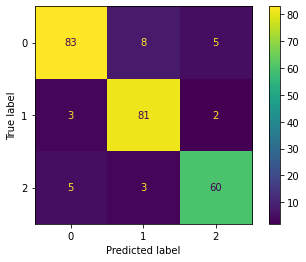

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_pred, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()